In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [83]:
model = tf.keras.models.load_model('MNIST.keras')

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          57,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,862 (686.96 KB)

 Trainable params: 58,620 (228.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,242 (457.98 KB)

In [97]:
def preprocess_image(gray_image):
    image = cv.resize(gray_image, (500, 400))
    blur_image = cv.GaussianBlur(image, (5, 5), 0)
    _, binary_image = cv.threshold(blur_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    ##Find contours
    contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    ##Draw bounding box
    bounding_boxes = [cv.boundingRect(c)for c in contours]

    for (x, y, w, h) in bounding_boxes:
        cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv.imshow("image", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return image, binary_image, bounding_boxes

In [98]:
def prepare_digits(image):
    resize_image = cv.resize(image, (28, 28))
    float_image = resize_image.astype('float32')
    input_image = tf.expand_dims(float_image, axis=-1)
    input_image = tf.expand_dims(input_image, axis=0)
    return input_image

In [99]:
def pred_plot(bounding_boxes):
    store = []
    plt.figure(figsize=(15, 5))
    bounding_boxes = sorted(bounding_boxes, key=lambda b: b[0])
    for i, (x, y, w, h) in enumerate(bounding_boxes):
        digit_image = binary_image[y-10:y+h+10, x-10:x+w+10]
        input_digit = prepare_digits(digit_image)
        predicted = model.predict(input_digit).argmax()
        plt.subplot(2, 5, i+1)
        plt.imshow(digit_image, cmap='gray')
        plt.title(predicted)
        plt.axis(False)
        print(f"Predicted: {predicted}")
        store.append(predicted)
    return store

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted: 5
[8, 0, 7, 1, 9, 2, 3, 4, 5]


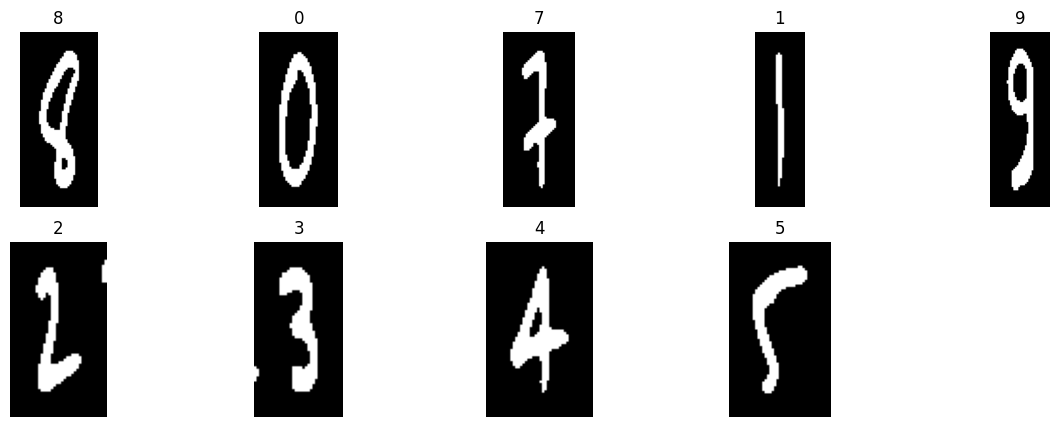

In [100]:
gray_image = cv.imread('Data/digits.jpeg', 0)
image, binary_image, bounding_boxes = preprocess_image(gray_image)
store = pred_plot(bounding_boxes)
print(store)

Predicted: [8, 0, 7, 1, 9, 2, 3, 4, 5]


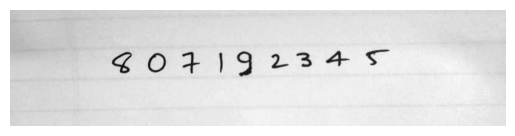

In [102]:
plt.imshow(gray_image, cmap='gray')
plt.axis(False)
print(f"Predicted: {store}")